# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Fix the issue with fare column usign regex flag then type casting of the whole column 
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the dataset and display top/bottom rows

In [4]:
df = pd.read_csv("titanic_dataset_modified.csv")

In [5]:
df.head()

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,$151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,$151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,$151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.tail(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,$7.23,NaN,C,NaN,NaN,NaN
1308,1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,$7.88,NaN,S,NaN,NaN,NaN


### Get a summary of whole dataset

In [8]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [13]:
# df.describe(exclude=np.object)
df.describe(include=np.object)

,name,gender,ticket,fare,cabin,embarked,boat,home.dest
count,1309,1309,1309,1308,295,1307,486,745
unique,1307,2,929,263,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,$8.05,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,60,6,914,39,64


###### How to display all the columns

In [14]:
df.describe(include="all")

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308,295,1307,486,121.000000,745
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,263,186,3,27,NaN,369
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,$8.05,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,60,6,914,39,NaN,64
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,NaN,NaN,NaN,NaN,160.809917,NaN
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,NaN,NaN,NaN,NaN,97.696922,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,256.000000,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null int64
survived      1309 non-null int64
name          1309 non-null object
gender        1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null object
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 153.5+ KB


### Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

In [16]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### Drop those columns which needs to be dropped

In [17]:
df.drop(["Unnamed: 0","name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True)

In [18]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S


### Find out the data type of each column

In [19]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

### Find out the number of entries in each column

In [20]:
df.columns

Index(['pclass', 'survived', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [21]:
df.keys()

Index(['pclass', 'survived', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [22]:
# Using size and count
# Size : will return total nu,ber of observations including missing values
# Count: Will return only non-zero values

In [23]:
for k in df.keys():
    #print(k)
    print("Total number of entries in ",k,"::",df[k].size)

Total number of entries in  pclass :: 1309
Total number of entries in  survived :: 1309
Total number of entries in  gender :: 1309
Total number of entries in  age :: 1309
Total number of entries in  sibsp :: 1309
Total number of entries in  parch :: 1309
Total number of entries in  fare :: 1309
Total number of entries in  embarked :: 1309


In [24]:
for k in df.keys():
    #print(k)
    print("Total number of entries in ",k,"::",df[k].count())

Total number of entries in  pclass :: 1309
Total number of entries in  survived :: 1309
Total number of entries in  gender :: 1309
Total number of entries in  age :: 1046
Total number of entries in  sibsp :: 1309
Total number of entries in  parch :: 1309
Total number of entries in  fare :: 1308
Total number of entries in  embarked :: 1307


### Find out which columns is having more number of missing values

In [25]:
for k in df.keys():
    #print(k)
    print("Total number of missing values in ",k,"::",df[k].size-df[k].count())

Total number of missing values in  pclass :: 0
Total number of missing values in  survived :: 0
Total number of missing values in  gender :: 0
Total number of missing values in  age :: 263
Total number of missing values in  sibsp :: 0
Total number of missing values in  parch :: 0
Total number of missing values in  fare :: 1
Total number of missing values in  embarked :: 2


##### in %

In [26]:
for k in df.keys():
    #print(k)
    print("Total number of missing values in ",k,"::",((df[k].size-df[k].count())/df[k].size)*100)

Total number of missing values in  pclass :: 0.0
Total number of missing values in  survived :: 0.0
Total number of missing values in  gender :: 0.0
Total number of missing values in  age :: 20.091673032849503
Total number of missing values in  sibsp :: 0.0
Total number of missing values in  parch :: 0.0
Total number of missing values in  fare :: 0.07639419404125286
Total number of missing values in  embarked :: 0.15278838808250572


In [27]:
for k in df.keys():
    #print(k)
    print("Total number of missing values in ",k,"::",round(((df[k].size-df[k].count())/df[k].size)*100),2)

Total number of missing values in  pclass :: 0.0 2
Total number of missing values in  survived :: 0.0 2
Total number of missing values in  gender :: 0.0 2
Total number of missing values in  age :: 20.0 2
Total number of missing values in  sibsp :: 0.0 2
Total number of missing values in  parch :: 0.0 2
Total number of missing values in  fare :: 0.0 2
Total number of missing values in  embarked :: 0.0 2


###### Finding missing values using isnull()

In [28]:
df.age.isnull().any()

True

In [29]:
df.age.isnull().sum()

263

### How to get unique values of any features

In [30]:
df.pclass.unique()

array([1, 2, 3], dtype=int64)

In [31]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

### How to find out counts of each category

In [32]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [33]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

### Replace missing values in each column and provide the reason for choosing one function to replace missing values

###### for age column

In [34]:
df.age

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [35]:
# df.fillna(<value_to_be_filled>,inplace=True)

In [36]:
df.age.mean()

29.8811345124283

In [37]:
df.age.fillna(df.age.mean(),inplace=True)

In [38]:
df.age.isnull().any()

False

In [39]:
df.age.isnull().sum()

0

###### Fix embarked column

In [40]:
df.embarked.isnull().sum()

2

In [41]:
df.embarked.dtype

dtype('O')

In [42]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [43]:
df.embarked.mode()

0    S
dtype: object

In [44]:
df.embarked.mode()[0]

'S'

In [45]:
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [46]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [47]:
df.embarked.isnull().sum()

0

### Fix the issue with fare column using regex flag then type casting of the whole column

In [48]:
df.fare.head(4)

0    $211.34
1    $151.55
2    $151.55
3    $151.55
Name: fare, dtype: object

In [49]:
df.fare.dtype

dtype('O')

In [50]:
# df.replace({<what_u_want_to_replace>:<new_value>},regex=True,inplace=True)
# df.fare.replace({"\s*\$\s*":""},regex=True,inplace=True)
df.fare.replace({"\$":""},regex=True,inplace=True)

In [51]:
df.fare.head(4)

0    211.34
1    151.55
2    151.55
3    151.55
Name: fare, dtype: object

In [52]:
df.fare = df.fare.astype("float16")

In [53]:
df.fare.head(4)

0    211.375
1    151.500
2    151.500
3    151.500
Name: fare, dtype: float16

In [54]:
df.fare.fillna(df.fare.median(),inplace=True)

In [55]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.281250
std,0.837836,0.486055,12.883199,1.041658,0.865560,inf
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.898438
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.453125
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.281250
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.500000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
gender      1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float16
embarked    1309 non-null object
dtypes: float16(1), float64(1), int64(4), object(2)
memory usage: 74.3+ KB


In [57]:
df.head(5)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.375,S
1,1,1,male,0.9167,1,2,151.500,S
2,1,0,female,2.0000,1,2,151.500,S
3,1,0,male,30.0000,1,2,151.500,S
4,1,0,female,25.0000,1,2,151.500,S


### Dump the clean data to a file

In [58]:
df.to_html("clean_data.html")
df.to_csv("clean_data.csv")

### Find out total number of Male/Female passengers

In [59]:
df.gender.value_counts()

male      843
female    466
Name: gender, dtype: int64

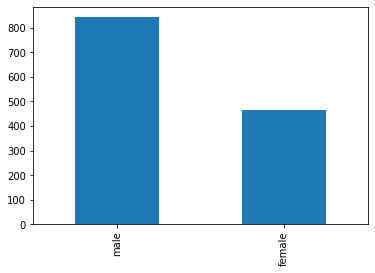

In [60]:
df.gender.value_counts().plot(kind="bar") # kind = line,hist,bar,barh,pie,kde,hexbin,scatter

### Find out total number of passengers in each passenger class

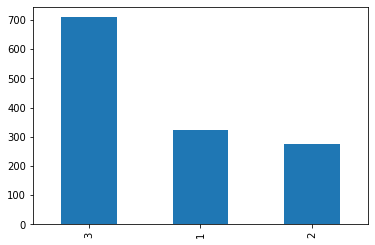

In [61]:
df.pclass.value_counts().plot(kind="bar")

### Find out total number of Survived/Not-survived passengers

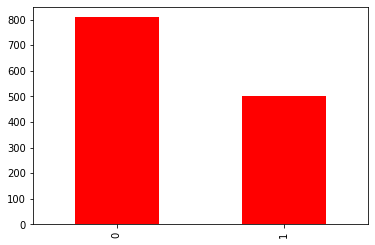

In [62]:
df.survived.value_counts().plot(kind="bar",color="r")

### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

In [63]:
ag1 = df.age[df.age<=30]
ag2 = df.age[(df.age>30) & (df.age<=60)]
ag3 = df.age[df.age>60]

In [64]:
print(ag1.count())
print(ag2.count())
print(ag3.count())

872
404
33


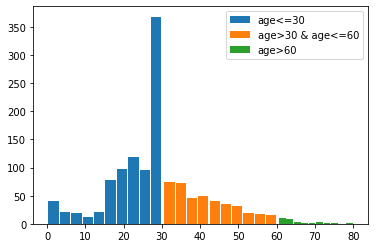

In [65]:
plt.hist(ag1,rwidth=.9,label="age<=30")
plt.hist(ag2,rwidth=.9,label="age>30 & age<=60")
plt.hist(ag3,rwidth=.9,label="age>60")
plt.legend()
plt.show()

# How to do Grouping

### Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [66]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.375,S
1,1,1,male,0.9167,1,2,151.500,S


In [72]:
# df.groupby("embarked")["pclass"].count()
df.groupby(["embarked", "pclass"])["pclass"].count()

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         179
          2         242
          3         495
Name: pclass, dtype: int64

In [73]:
df.groupby(["embarked", "pclass"])["pclass"].size()

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         179
          2         242
          3         495
Name: pclass, dtype: int64

In [79]:
df.groupby(["embarked", "pclass"])["pclass"].groups

{('C', 1): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 ('C',
  2): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 ('C',
  3): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  654,  657,  658,
             ...
             1286, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307],
            dtype='int64', length=101),
 ('Q', 1): Int64Index([206, 207, 208], dtype='int64'),
 ('Q', 2): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 ('Q',
  3): Int64Index([ 667,  682,  683,  684,  686,  692,  693,  694,  695,  702,
             ...
             1149, 1162, 1163, 1167, 1193, 1195, 1198, 1215, 1216, 1249],
            dtype='int64', length=113),
 ('S', 1): Int64Index([ 

In [93]:
# chk = df.groupby(["embarked", "pclass"])["pclass"]
# chk.get_group(('S', 1))

In [94]:
grp = df.groupby(["pclass","embarked"])
grp

In [95]:
grp.groups

{(1, 'C'): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 (1, 'Q'): Int64Index([206, 207, 208], dtype='int64'),
 (1, 'S'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
             ...
             305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
            dtype='int64', length=179),
 (2,
  'C'): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 (2, 'Q'): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 (2, 'S'): Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
             ...
             590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
            dtype='int64', length=242),
 (3,
  'C'): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  

### gettign individual group details

In [96]:
grp.get_group((1, 'C'))

,pclass,survived,gender,age,sibsp,parch,fare,embarked
9,1,0,male,71.0,0,0,49.5000,C
10,1,0,male,47.0,1,0,227.5000,C
11,1,1,female,18.0,1,0,227.5000,C
12,1,1,female,24.0,0,0,69.3125,C
16,1,0,male,24.0,0,1,247.5000,C
...,...,...,...,...,...,...,...,...
314,1,1,female,50.0,1,1,211.5000,C
316,1,0,male,51.0,0,1,61.3750,C
317,1,1,male,21.0,0,1,61.3750,C
319,1,1,female,31.0,0,0,134.5000,C


In [97]:
grp.get_group((1, 'C')).shape

(141, 8)

In [98]:
grp.get_group((1, 'C')).shape[0]

141

In [99]:
grp.get_group((1, 'C')).pclass.size

141

In [100]:
grp.get_group((1, 'C')).pclass.count()

141

### Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [101]:
for k in grp.groups:
    print("Total number of passengers in group:",k,grp.get_group(k).pclass.size)
    

Total number of passengers in group: (1, 'C') 141
Total number of passengers in group: (1, 'Q') 3
Total number of passengers in group: (1, 'S') 179
Total number of passengers in group: (2, 'C') 28
Total number of passengers in group: (2, 'Q') 7
Total number of passengers in group: (2, 'S') 242
Total number of passengers in group: (3, 'C') 101
Total number of passengers in group: (3, 'Q') 113
Total number of passengers in group: (3, 'S') 495


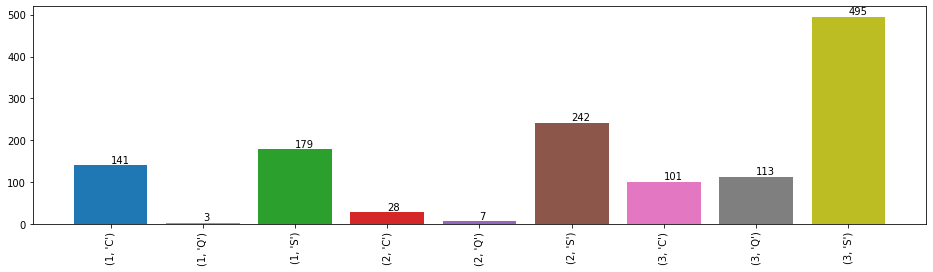

In [102]:
plt.figure(figsize=(16,4))
for k in grp.groups:
    plt.bar(str(k),grp.get_group(k).pclass.size)
    plt.text(str(k),grp.get_group(k).pclass.size+5,grp.get_group(k).pclass.size)
plt.xticks(rotation=90)
plt.show()

In [103]:
grp.get_group(k).pclass.size

495

In [104]:
d1 = {}
for k in grp.groups:
    d1[str(k)]=grp.get_group(k).pclass.size
    

In [105]:
d1.keys()

dict_keys(["(1, 'C')", "(1, 'Q')", "(1, 'S')", "(2, 'C')", "(2, 'Q')", "(2, 'S')", "(3, 'C')", "(3, 'Q')", "(3, 'S')"])

### How to srot and visualize the data in ascending.descending order

In [106]:
d1_df = pd.DataFrame(d1.values(),index=d1.keys(),columns=["A"])
d1_df

,A
"(1, 'C')",141
"(1, 'Q')",3
"(1, 'S')",179
"(2, 'C')",28
"(2, 'Q')",7
"(2, 'S')",242
"(3, 'C')",101
"(3, 'Q')",113
"(3, 'S')",495


In [107]:
d1_df.sort_values(by="A",ascending=False)

,A
"(3, 'S')",495
"(2, 'S')",242
"(1, 'S')",179
"(1, 'C')",141
"(3, 'Q')",113
"(3, 'C')",101
"(2, 'C')",28
"(2, 'Q')",7
"(1, 'Q')",3


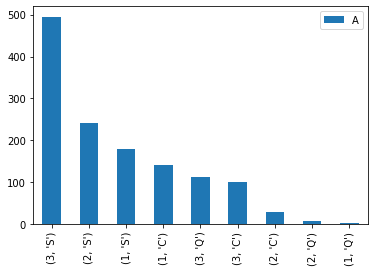

In [108]:
d1_df.sort_values(by="A",ascending=False).plot(kind="bar")

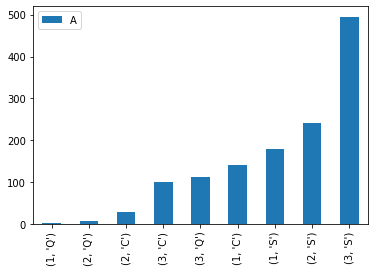

In [109]:
d1_df.sort_values(by="A").plot(kind="bar")

### Find out which age group survived

###### Try this at home

# Merging DataSet

In [112]:
a = np.random.randint(1,25,30).reshape(10,3)
b = np.random.randint(1,25,30).reshape(10,3)
df_a = pd.DataFrame(a,columns=list("ABC"))
df_b = pd.DataFrame(a,columns=list("CDE"))
print(df_a)
print("#"*5)
print(df_b)

    A   B   C
0  16  19   5
1  21  24  20
2  21  23   6
3  18   9  17
4  13  21  21
5  19   7  23
6  17  20   1
7  22  21  23
8  20   8  23
9  22   9   7
#####
    C   D   E
0  16  19   5
1  21  24  20
2  21  23   6
3  18   9  17
4  13  21  21
5  19   7  23
6  17  20   1
7  22  21  23
8  20   8  23
9  22   9   7


In [113]:
df_a.merge(df_b)

,A,B,C,D,E
0,21,24,20,8,23
1,18,9,17,20,1
2,13,21,21,24,20
3,13,21,21,23,6


In [114]:
df_a.merge(df_b,indicator=True)

,A,B,C,D,E,_merge
0,21,24,20,8,23,both
1,18,9,17,20,1,both
2,13,21,21,24,20,both
3,13,21,21,23,6,both


In [115]:
df_a.merge(df_b,how="left",indicator=True)

,A,B,C,D,E,_merge
0,16,19,5,NaN,NaN,left_only
1,21,24,20,8.0,23.0,both
2,21,23,6,NaN,NaN,left_only
3,18,9,17,20.0,1.0,both
4,13,21,21,24.0,20.0,both
5,13,21,21,23.0,6.0,both
6,19,7,23,NaN,NaN,left_only
7,17,20,1,NaN,NaN,left_only
8,22,21,23,NaN,NaN,left_only
9,20,8,23,NaN,NaN,left_only


In [116]:
df_a.merge(df_b,how="right",indicator=True)

,A,B,C,D,E,_merge
0,21.0,24.0,20,8,23,both
1,18.0,9.0,17,20,1,both
2,13.0,21.0,21,24,20,both
3,13.0,21.0,21,23,6,both
4,NaN,NaN,16,19,5,right_only
5,NaN,NaN,18,9,17,right_only
6,NaN,NaN,13,21,21,right_only
7,NaN,NaN,19,7,23,right_only
8,NaN,NaN,22,21,23,right_only
9,NaN,NaN,22,9,7,right_only


In [117]:
df_a.merge(df_b,how="outer",indicator=True)

,A,B,C,D,E,_merge
0,16.0,19.0,5,NaN,NaN,left_only
1,21.0,24.0,20,8.0,23.0,both
2,21.0,23.0,6,NaN,NaN,left_only
3,18.0,9.0,17,20.0,1.0,both
4,13.0,21.0,21,24.0,20.0,both
5,13.0,21.0,21,23.0,6.0,both
6,19.0,7.0,23,NaN,NaN,left_only
7,22.0,21.0,23,NaN,NaN,left_only
8,20.0,8.0,23,NaN,NaN,left_only
9,17.0,20.0,1,NaN,NaN,left_only
